# MNIST DCGAN Example

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[MDE-01]
Import modules and set a random seed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers, models, initializers
from keras.datasets import mnist

np.random.seed(20190615)
tf.set_random_seed(20190615)

Using TensorFlow backend.


####[MDE-02]
Download the MNIST dataset and store into NumPy arrays.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

####[MDE-03]
Defina a generator model.

In [3]:
latent_dim = 64

generator = models.Sequential()
generator.add(
  layers.Dense(7*7*128, kernel_initializer=initializers.TruncatedNormal(),
               input_shape=(latent_dim,), name='expand'))
generator.add(layers.LeakyReLU(name='leaky_relu1'))
generator.add(layers.Reshape((7, 7, 128), name='reshape'))
generator.add(
  layers.Conv2DTranspose(64, 5, strides=2, padding='same',
                         kernel_initializer=initializers.TruncatedNormal(),
                         name='deconv1'))
generator.add(layers.LeakyReLU(name='leaky_relu2'))
generator.add(
  layers.Conv2DTranspose(1, 5, strides=2, padding='same',
                         kernel_initializer=initializers.TruncatedNormal(),
                         activation='sigmoid', name='deconv2'))
generator.add(layers.Flatten(name='flatten'))
generator.summary()

W0617 13:27:36.423468 139744256374656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 13:27:36.426343 139744256374656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 13:27:36.429745 139744256374656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
expand (Dense)               (None, 6272)              407680    
_________________________________________________________________
leaky_relu1 (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
deconv1 (Conv2DTranspose)    (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_relu2 (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
deconv2 (Conv2DTranspose)    (None, 28, 28, 1)         1601      
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
Total para

####[MDE-04]
Defina a discriminator model.

In [4]:
discriminator = models.Sequential()
discriminator.add(layers.Reshape((28, 28, 1), input_shape=((28*28,)),
                                 name='reshape'))
discriminator.add(
  layers.Conv2D(64, (5, 5), strides=2, padding='same',
                kernel_initializer=initializers.TruncatedNormal(),
                name='conv1'))
discriminator.add(layers.LeakyReLU(name='leaky_relu1'))
discriminator.add(
  layers.Conv2D(128, (5, 5), strides=2, padding='same',
                kernel_initializer=initializers.TruncatedNormal(),
                name='conv2'))
discriminator.add(layers.LeakyReLU(name='leaky_relu2'))
discriminator.add(layers.Flatten(name='flatten'))
discriminator.add(layers.Dropout(rate=0.4, name='dropout'))
discriminator.add(layers.Dense(1, activation='sigmoid', name='sigmoid'))

discriminator.summary()

W0617 13:27:36.559780 139744256374656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 13:27:36.568233 139744256374656 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0617 13:27:36.583206 139744256374656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_relu1 (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_relu2 (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
__________

####[MDE-05]
Compile the discriminator using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

W0617 13:27:36.606012 139744256374656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 13:27:36.634743 139744256374656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


####[MDE-06]
Define an end-to-end GAN model to train the generator.

In [6]:
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan_model = models.Model(gan_input, gan_output)

gan_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               614145    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 212865    
Total params: 827,010
Trainable params: 614,145
Non-trainable params: 212,865
_________________________________________________________________


####[MDE-07]
Compile the GAN model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
gan_model.compile(optimizer='adam', loss='binary_crossentropy')

####[MDE-08]
Define some working variables to trace the training process.

In [0]:
batch_size = 32
image_num = 0
step = 0
examples = []
sample_inputs = np.random.rand(8, latent_dim) * 2.0 - 1.0
examples.append(generator.predict(sample_inputs))

####[MDE-09]
Train the model for 80,000 batches.

In [9]:
for _ in range(80000):
  random_inputs = np.random.rand(batch_size, latent_dim) * 2.0 - 1.0
  generated_images = generator.predict(random_inputs)
  real_images = train_images[image_num : image_num+batch_size]
  all_images = np.concatenate([generated_images, real_images])
  labels = np.concatenate([np.zeros((batch_size, 1)),
                           np.ones((batch_size, 1))])
  labels += 0.05 * np.random.random(labels.shape)
  d_loss = discriminator.train_on_batch(all_images, labels)

  random_inputs = np.random.rand(batch_size, latent_dim) * 2.0 - 1.0
  fake_labels = np.ones((batch_size, 1))
  g_loss = gan_model.train_on_batch(random_inputs, fake_labels)

  image_num += batch_size
  if image_num + batch_size > len(train_images):
    image_num = 0

  step += 1
  if step % 8000 == 0:
    print('step: {}, loss(discriminator, generator): {:6.4f}, {:6.4f}'.format(
            step, d_loss, g_loss))
    examples.append(generator.predict(sample_inputs))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


step: 8000, loss(discriminator, generator): 0.5180, 1.6223
step: 16000, loss(discriminator, generator): 0.5731, 0.7225
step: 24000, loss(discriminator, generator): 0.5040, 1.7312
step: 32000, loss(discriminator, generator): 0.5488, 0.8418
step: 40000, loss(discriminator, generator): 0.4771, 0.7931
step: 48000, loss(discriminator, generator): 0.4611, 1.4691
step: 56000, loss(discriminator, generator): 0.4372, 2.0176
step: 64000, loss(discriminator, generator): 0.5563, 1.5455
step: 72000, loss(discriminator, generator): 0.8252, 1.6481
step: 80000, loss(discriminator, generator): 0.5449, 1.3346


####[MDE-10]
Show the progress of sample images.

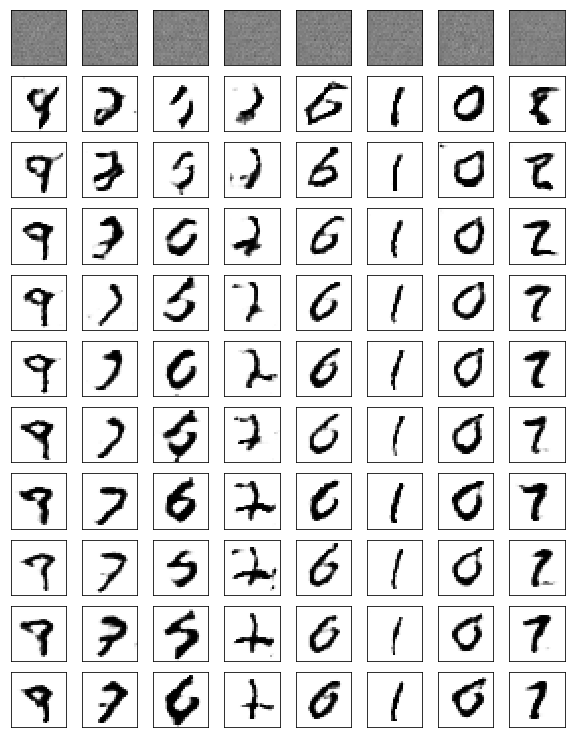

In [10]:
def show_images(examples):
  fig = plt.figure(figsize=(10, 1.2*len(examples)))
  c = 1
  for images in examples:
    for image in images:
      subplot = fig.add_subplot(len(examples), 8, c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.imshow(image.reshape((28, 28)),
                     vmin=0, vmax=1, cmap=plt.cm.gray_r)
      c += 1

show_images(examples)

####[MDE-10]
Mount your Google Drive on `/content/gdrive`.

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDE-11]
Export the trained model as a file `gan_generator.hd5` on your Google Drive.

In [0]:
generator.save('/content/gdrive/My Drive/gan_generator.hd5')